In [1]:
!pip install tensorflow matplotlib scikit-learn

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
    from google.colab import files
    uploaded = files.upload()

Saving braintumor.zip to braintumor.zip


In [7]:
import zipfile
import os

# Unzip the uploaded file (replace filename if needed)
zip_path = "/content/braintumor.zip"  # or use: list(uploaded.keys())[0]
extract_path = "/content/brain_tumor_dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Check folders
for root, dirs, files in os.walk(extract_path):
    print(f"{root} --> {len(files)} files")


/content/brain_tumor_dataset --> 0 files
/content/brain_tumor_dataset/Brain MRI Images --> 0 files
/content/brain_tumor_dataset/Brain MRI Images/Brain MRI Images --> 0 files
/content/brain_tumor_dataset/Brain MRI Images/Brain MRI Images/Validation --> 0 files
/content/brain_tumor_dataset/Brain MRI Images/Brain MRI Images/Validation/Normal --> 34 files
/content/brain_tumor_dataset/Brain MRI Images/Brain MRI Images/Validation/Tumor --> 46 files
/content/brain_tumor_dataset/Brain MRI Images/Brain MRI Images/Train --> 0 files
/content/brain_tumor_dataset/Brain MRI Images/Brain MRI Images/Train/Normal --> 136 files
/content/brain_tumor_dataset/Brain MRI Images/Brain MRI Images/Train/Tumor --> 184 files
/content/brain_tumor_dataset/Brain_tumor_images --> 0 files
/content/brain_tumor_dataset/Brain_tumor_images/Normal --> 170 files
/content/brain_tumor_dataset/Brain_tumor_images/Tumor --> 230 files


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
train_dir = os.path.join(extract_path, 'Brain MRI Images/Brain MRI Images/Train')
val_dir = os.path.join(extract_path, 'Brain MRI Images/Brain MRI Images/Validation')


In [10]:
img_size=(150,150)

In [11]:
train_gen= ImageDataGenerator(rescale=1./255)
val_gen=ImageDataGenerator(rescale=1./255)

In [12]:
train_data= train_gen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='binary'
)

Found 320 images belonging to 2 classes.


In [14]:
val_data= val_gen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='binary'
)

Found 80 images belonging to 2 classes.


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten,Dense , Dropout


In [16]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [18]:
history = model.fit(train_data, epochs=10, validation_data=val_data)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.6000 - loss: 1.8404 - val_accuracy: 0.6500 - val_loss: 0.6389
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.7494 - loss: 0.6010 - val_accuracy: 0.7250 - val_loss: 0.5565
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.7767 - loss: 0.4792 - val_accuracy: 0.8000 - val_loss: 0.4519
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.8438 - loss: 0.3334 - val_accuracy: 0.8500 - val_loss: 0.3668
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9131 - loss: 0.2458 - val_accuracy: 0.8500 - val_loss: 0.3592
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.9429 - loss: 0.1488 - val_accuracy: 0.9000 - val_loss: 0.3025
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.9819 - loss: 0.0956 - val_accuracy: 0.9000 - val_loss: 0.2804
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.9896 - loss: 0.0517 - val_accuracy: 0.9375 - val_loss: 0.2679
Epo

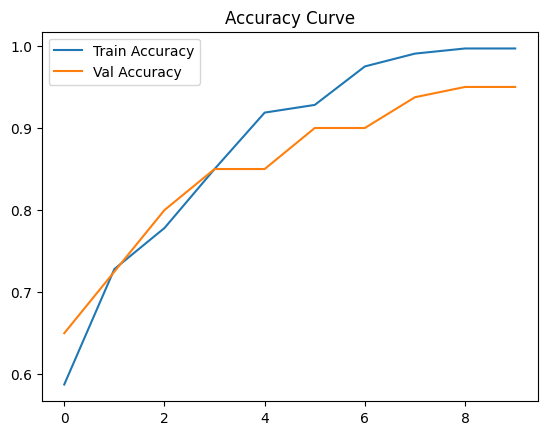

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

In [21]:
model.save("brain_tumor_model.h5")

In [22]:
from google.colab import files
files.download("brain_tumor_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>